China
Italy
Spain
Iran
France


Sample initial stage: ...
Stage:   0 Beta: 0.000 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.000 Steps:  25 Acce: 0.134
Stage:   2 Beta: 0.000 Steps:  25 Acce: 0.150
Stage:   3 Beta: 0.000 Steps:  25 Acce: 0.193
Stage:   4 Beta: 0.000 Steps:  21 Acce: 0.217
Stage:   5 Beta: 0.000 Steps:  18 Acce: 0.186
Stage:   6 Beta: 0.000 Steps:  22 Acce: 0.119
Stage:   7 Beta: 0.000 Steps:  25 Acce: 0.090
Stage:   8 Beta: 0.000 Steps:  25 Acce: 0.115
Stage:   9 Beta: 0.000 Steps:  25 Acce: 0.202
Stage:  10 Beta: 0.000 Steps:  20 Acce: 0.364
Stage:  11 Beta: 0.001 Steps:  10 Acce: 0.425
Stage:  12 Beta: 0.001 Steps:   8 Acce: 0.434
Stage:  13 Beta: 0.001 Steps:   8 Acce: 0.446
Stage:  14 Beta: 0.002 Steps:   7 Acce: 0.416
Stage:  15 Beta: 0.003 Steps:   8 Acce: 0.350
Stage:  16 Beta: 0.004 Steps:  10 Acce: 0.302
Stage:  17 Beta: 0.006 Steps:  12 Acce: 0.278
Stage:  18 Beta: 0.009 Steps:  14 Acce: 0.266
Stage:  19 Beta: 0.013 Steps:  14 Acce: 0.265
Stage:  20 Beta: 0.019 Steps:  14 Acce: 0.250
Stage:  

China
Italy
Spain
Iran
France


Sample initial stage: ...
Stage:   0 Beta: 0.000 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.000 Steps:  25 Acce: 0.185
Stage:   2 Beta: 0.000 Steps:  22 Acce: 0.198
Stage:   3 Beta: 0.000 Steps:  20 Acce: 0.212
Stage:   4 Beta: 0.000 Steps:  19 Acce: 0.227
Stage:   5 Beta: 0.000 Steps:  17 Acce: 0.249
Stage:   6 Beta: 0.000 Steps:  16 Acce: 0.292
Stage:   7 Beta: 0.000 Steps:  13 Acce: 0.337
Stage:   8 Beta: 0.001 Steps:  11 Acce: 0.338
Stage:   9 Beta: 0.001 Steps:  11 Acce: 0.310
Stage:  10 Beta: 0.001 Steps:  12 Acce: 0.281
Stage:  11 Beta: 0.002 Steps:  13 Acce: 0.261
Stage:  12 Beta: 0.004 Steps:  15 Acce: 0.232
Stage:  13 Beta: 0.005 Steps:  17 Acce: 0.229
Stage:  14 Beta: 0.008 Steps:  17 Acce: 0.217
Stage:  15 Beta: 0.013 Steps:  18 Acce: 0.203
Stage:  16 Beta: 0.020 Steps:  20 Acce: 0.196
Stage:  17 Beta: 0.030 Steps:  21 Acce: 0.199
Stage:  18 Beta: 0.043 Steps:  20 Acce: 0.194
Stage:  19 Beta: 0.062 Steps:  21 Acce: 0.209
Stage:  20 Beta: 0.086 Steps:  19 Acce: 0.215
Stage:  

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shap

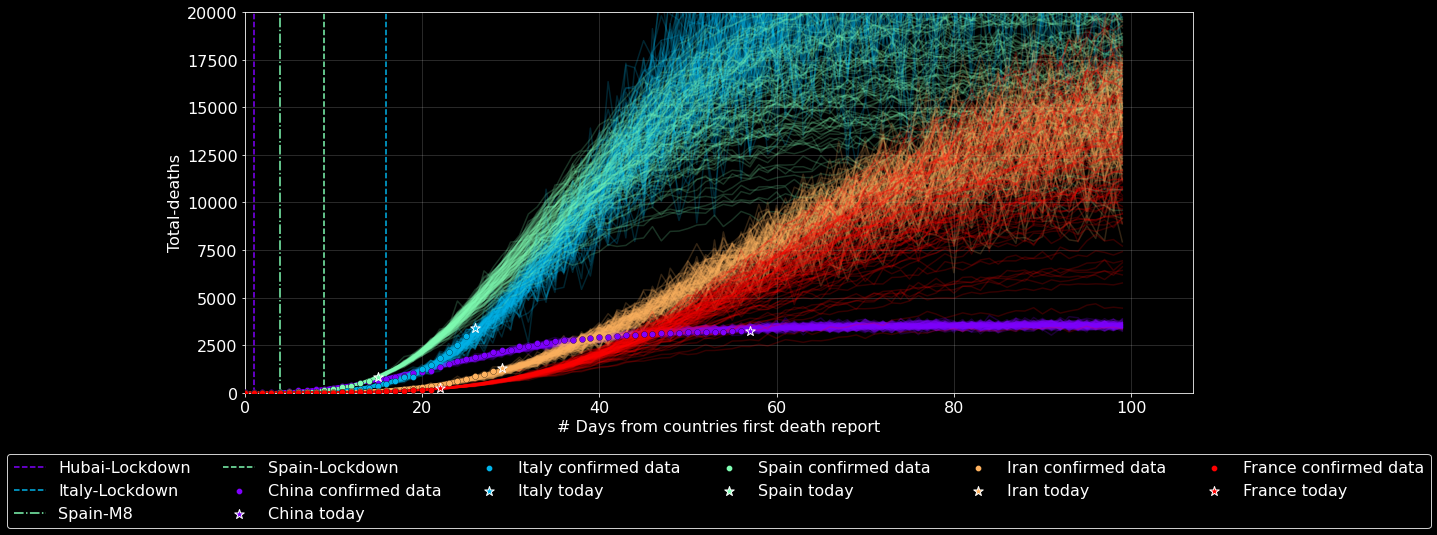

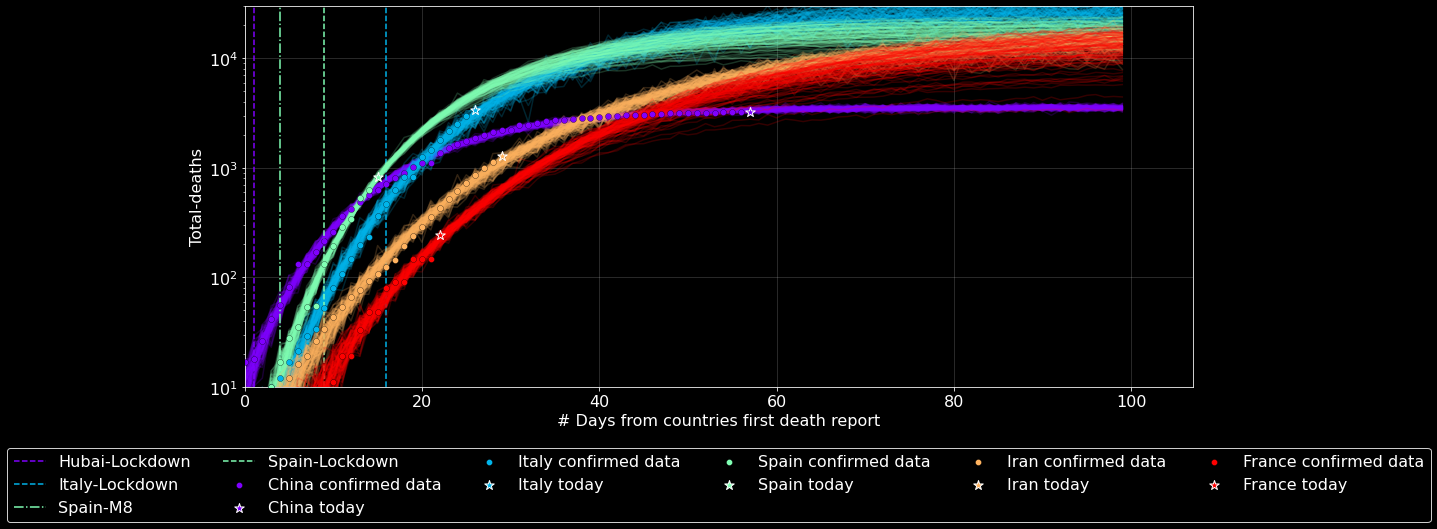

<Figure size 864x432 with 0 Axes>

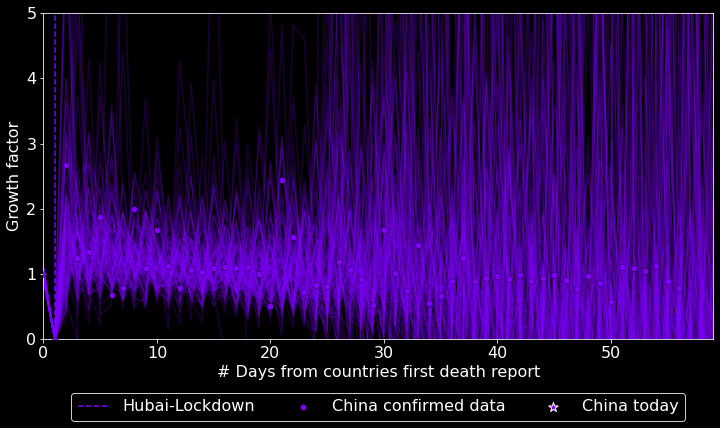

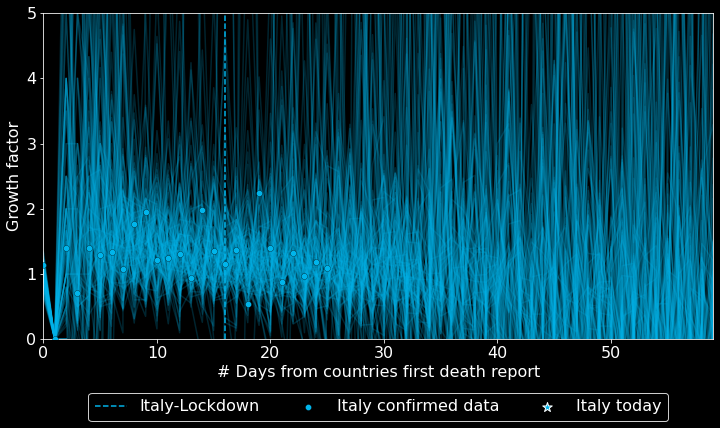

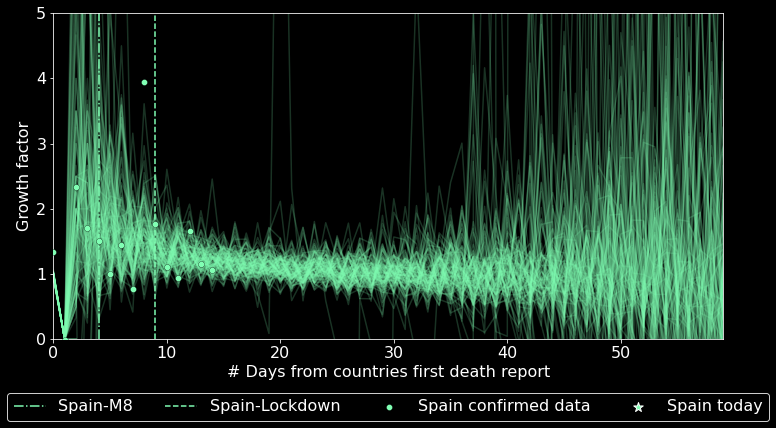

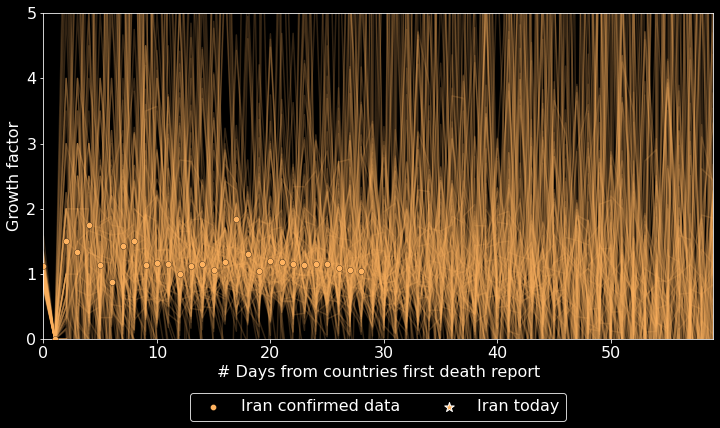

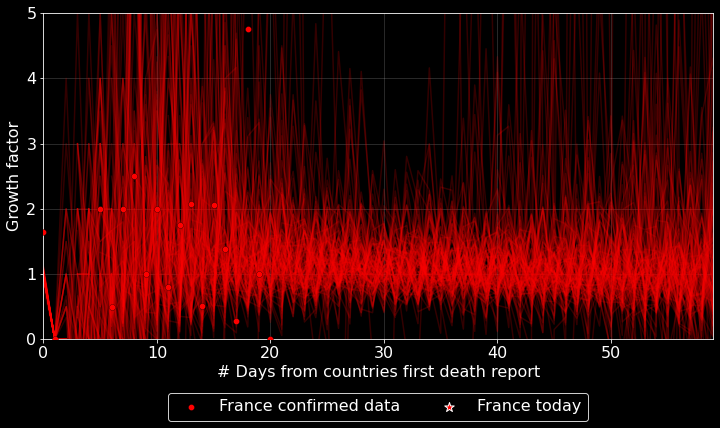

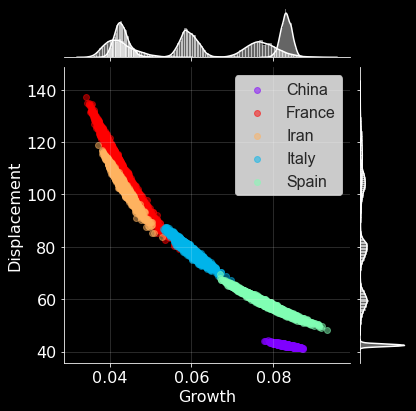

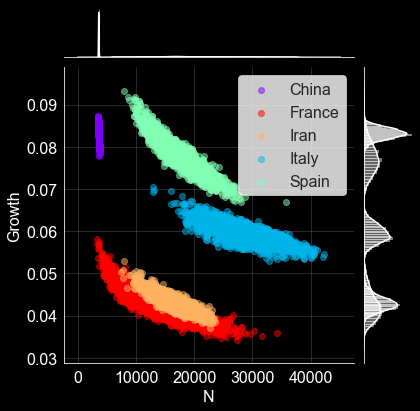

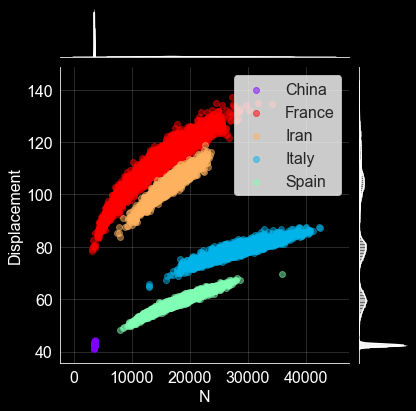

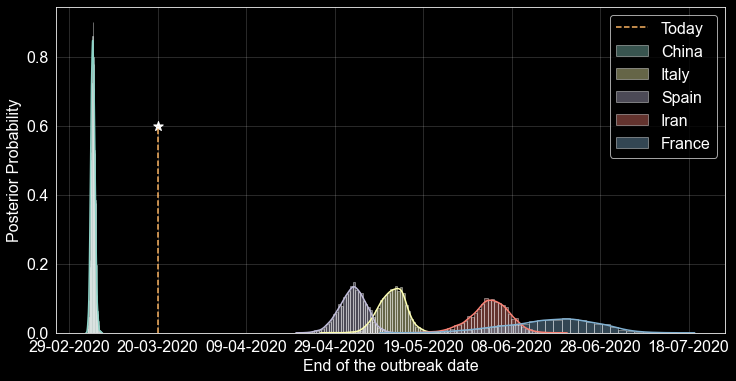

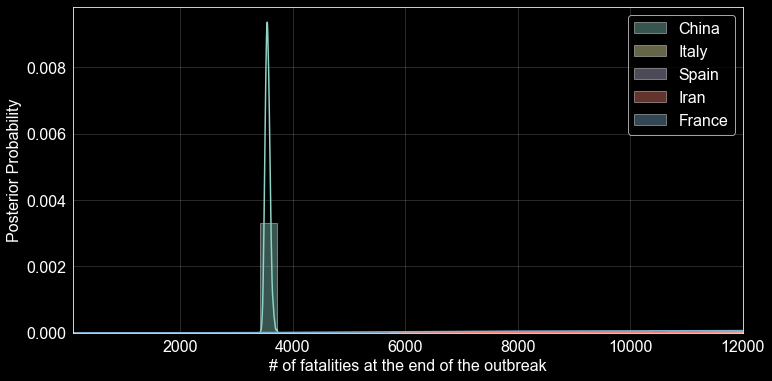

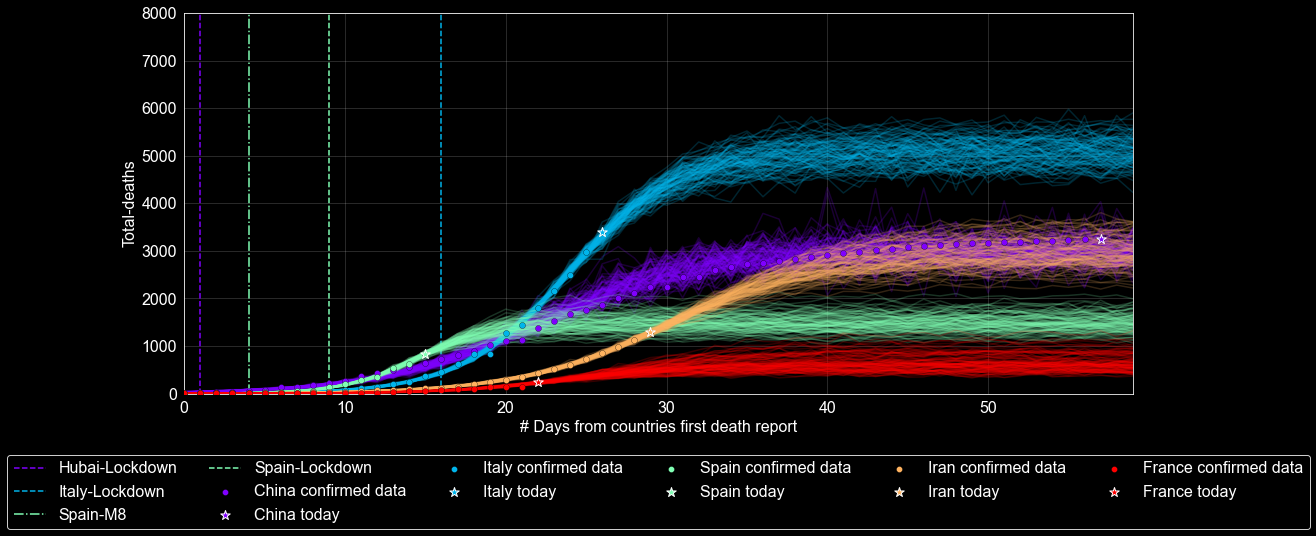

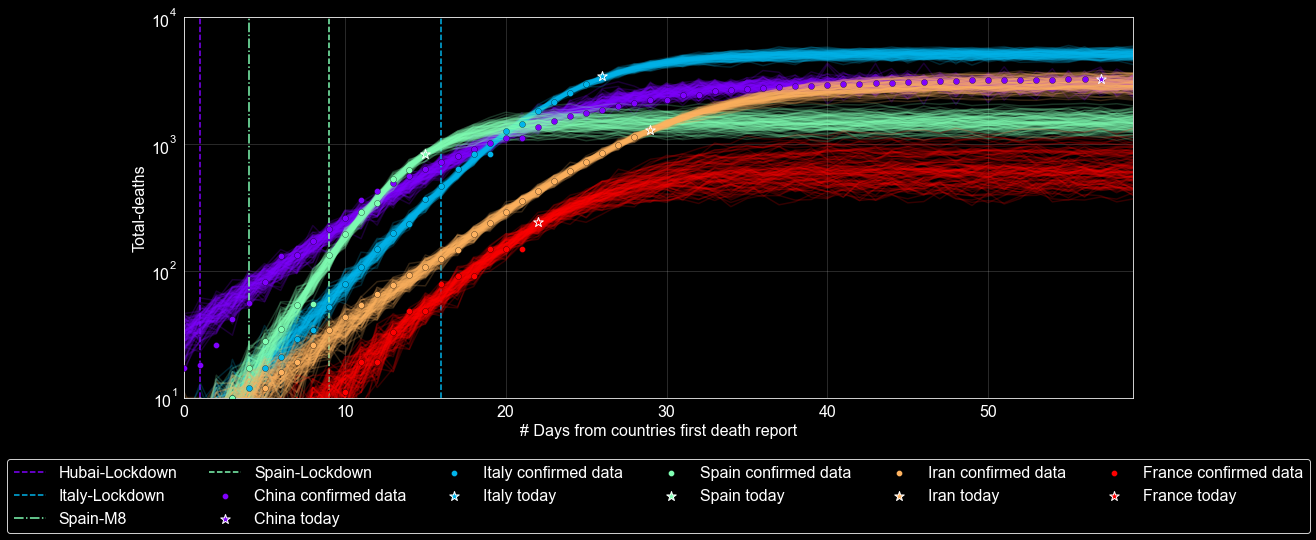

<Figure size 864x432 with 0 Axes>

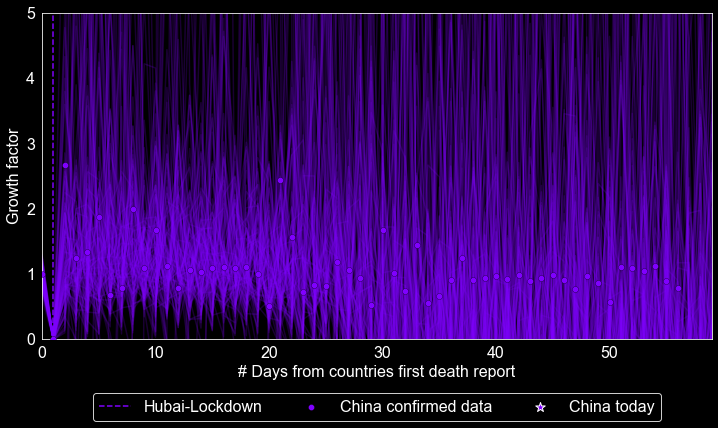

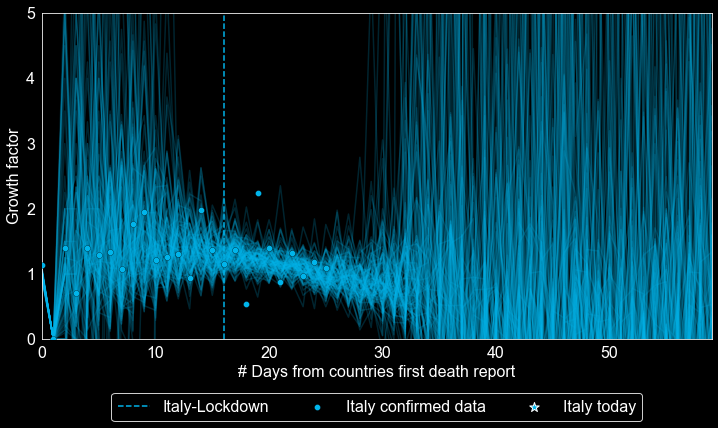

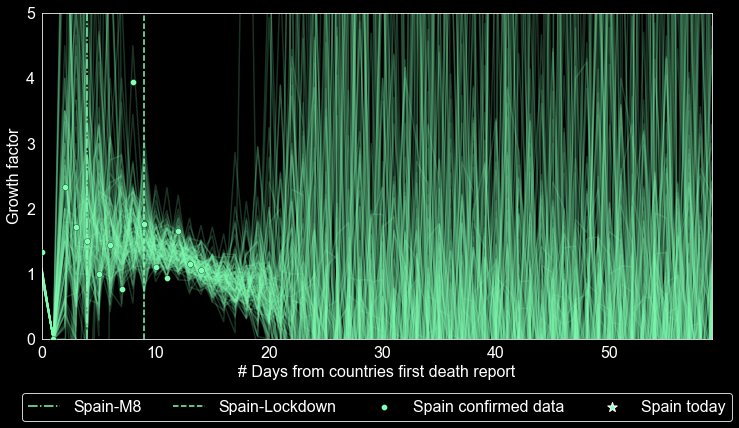

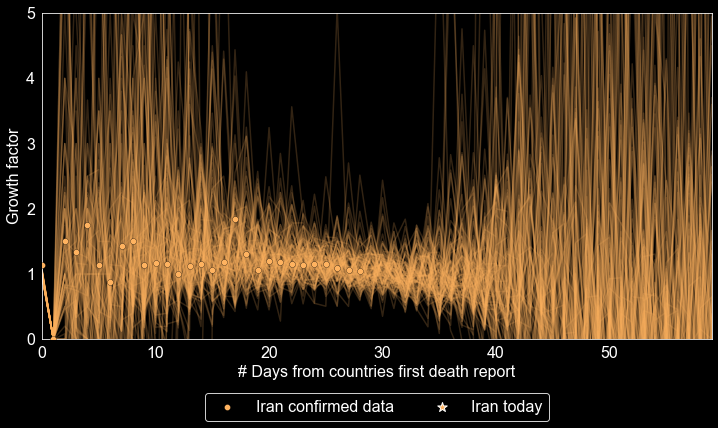

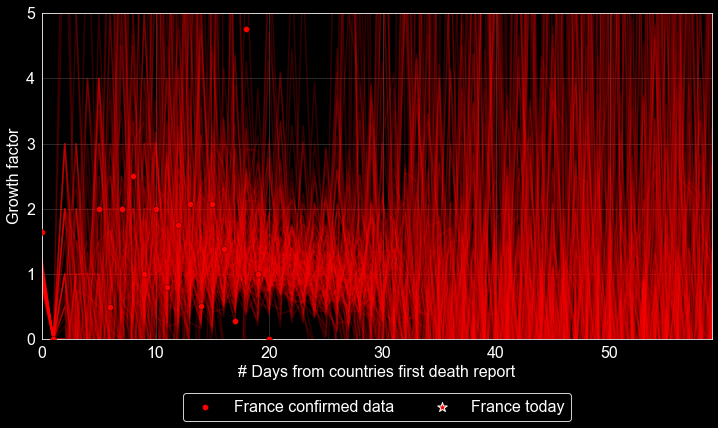

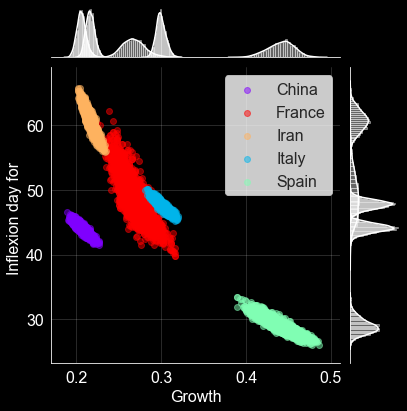

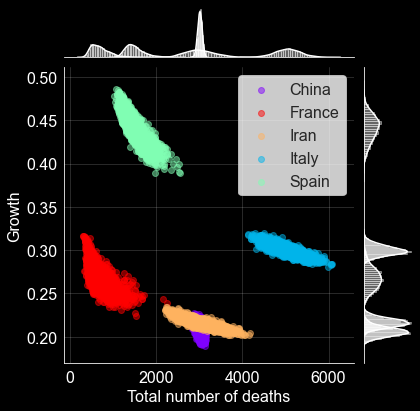

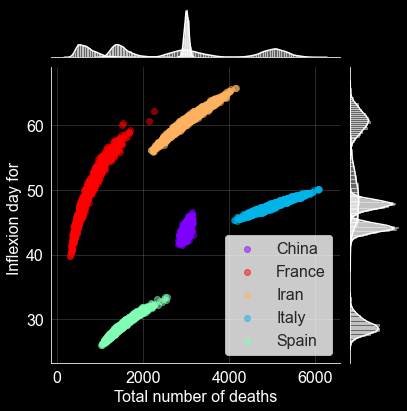

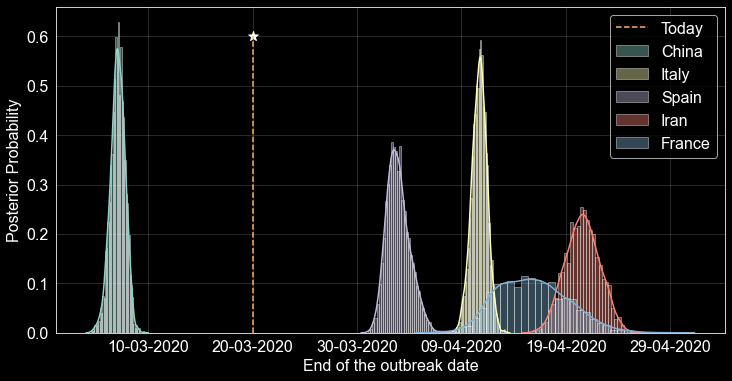

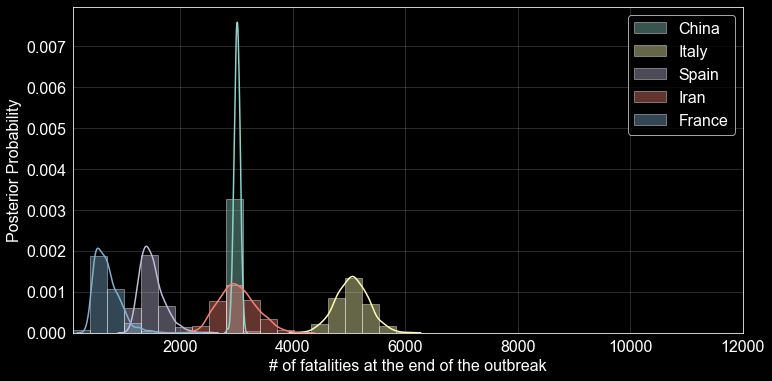

In [1]:
%matplotlib inline

flag_simulate = True

import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import arviz as az
import pymc3 as pm

import datetime

import requests
import io

def res_values(values, flag_res):
    res = values
    if flag_res:
        values_dif = np.roll(values, -1) - np.roll(values, 1)
        res = np.roll(values_dif, 0)/np.roll(values_dif, 1)
    return res

def func_sig(X, *p, flag_res):
    if flag_res:
        c1,c2,c3 = p
        AB = np.exp(c1*c2)
        A = np.exp(c1)
        AX = np.exp(c1*X)
        model = (A*AB+AX) / (AB + A*AX)
    else:
        c1,c2,c3 = p
        model = c3*(1/(1 + np.exp(-(c1 * (-c2 + X)))))
    return model

def plot_results(param):
    data = param['data']
    post_pred = param['post_pred']
    countries = param['countries']
    ylabel = param['ylabel']
    flag_res = param['flag_res']
    xlim = param['xlim']
    ylim = param['ylim'] 
    log_flag = param['log_flag']
    figsize = param['figsize']
    trace = param['trace']
    method = param['method']

    n_countries = len(countries)
    fig = plt.figure(figsize=figsize)
    colors = plt.cm.rainbow(np.linspace(0, 1, n_countries))
    plttype = 'Sigmoid-simulation-'
    
    for i, country in enumerate(countries):
        if flag_res:
            plttype = 'Growth-'
            fig = plt.figure(figsize=figsize)
        delay = np.argmin(np.abs(data[country+'-death'] - 17))
        delay = 0
        plt.scatter(data[country+'-day'] - delay, res_values(data[country+'-death'], flag_res), color=colors[i]                    
                    , edgecolors='black', linewidth=0.3,
                    label = country+' confirmed data', zorder=200)
                    
        plt.scatter(data[country+'-day'][-1] - delay, res_values(data[country+'-death'][-1], flag_res), color=colors[i]
                    , edgecolors='white', linewidth=1
                    , label = country+' today',zorder=200, marker = '*', s = 100)
        plt.plot(np.arange(0, post_pred[country].shape[1]) - delay, res_values(post_pred[country], flag_res).T, alpha=0.2, color=colors[i])
        p = [np.max(trace['c1'][:,i]),np.max(trace['c2'][:,i]),np.max(trace['c3'][:,i])]
        #plt.plot(np.linspace(0,60-1,60) - delay, func_sig(np.linspace(0,60-1,60), *p, flag_res = flag_res), alpha=1, color=colors[i])

        plt.xlabel('# Days from countries first death report')
        plt.ylabel(ylabel)
        
        cn = country
        if country == 'China':
            cn = 'Hubai'
            
        if cn in Dates.keys():
            for key, value in Dates[cn].items():
                ind = np.argwhere(data[country+'-date'] == key)[0][0]
                plt.plot([ind - delay,ind - delay],[0,30000], value[1], label = cn+'-'+ value[0], color=colors[i])

        plt.ylim(ylim)
        plt.xlim(xlim)
        
        if flag_res:
            lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14), fancybox=True, shadow=True, ncol=6)
            plt.savefig('../images/'+method+plttype+country+'.png', dpi=90, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.grid(alpha=0.2)

    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14), fancybox=True, shadow=True, ncol=6)
    name = 'linear'
    
    if log_flag: 
        plt.yscale('log')
        name = 'log'
    if ~flag_res:    
        plt.savefig('../images/'+method+plttype+name+'.png', dpi=90, bbox_extra_artists=(lgd,), bbox_inches='tight')

def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    plt.style.use('dark_background')
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['color'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)
            plt.grid(alpha=0.2)
        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        
        legends.append(name)
        #if k_is_color:
        color=k_is_color[name]
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color='white'
        )
        
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            vertical=True,
            color='white'
        )
        sns.set_style("whitegrid", {'axes.grid' : False})
    plt.legend(legends)
    plt.savefig('../images/'+'parameters'+method+'-'+cn[0]+'-'+cn[1]+'.png', dpi=90)
   
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
df_data = pd.read_csv(url, error_bad_lines=False)


countries = ['China','Italy','Spain','Iran','France']
th = 2

data = {}
data_table = {}
for country in df_data['Country/Region'].unique():
    if country == 'Europe':
        select = ['Italy','Spain','Germany','France'] 
    else:
        select = [country]
    value = df_data[df_data['Country/Region'].isin(select)].drop(['Province/State','Country/Region','Lat','Long'], axis=1).sum(axis=0)
    value = value[value >= th] 
    data[country+'-death'] = value.values
    days = len(data[country+'-death'])
    data[country+'-day'] = np.linspace(0,days-1,days)
    data[country+'-date'] = value.index.values
    if len(data[country+'-death']) > 2:
        Growthr = (data[country+'-death'][-1]-data[country+'-death'][-2])/data[country+'-death'][-2]
        Growthf = (data[country+'-death'][-1]-data[country+'-death'][-2])/(data[country+'-death'][-2]-data[country+'-death'][-3])

        data_table[country] = [data[country+'-day'][-1],data[country+'-death'][-1],str(np.round(Growthr*100, decimals=2))+" %", np.round(Growthf, decimals=2)]

        
html_content = '<h3>Date of the last update: '+str(data['Spain'+'-date'][-1])+'</h3>'+pd.DataFrame.from_dict(data_table, orient='index', 
                       columns = ['# days', '# deaths',  'Growth Rate'
                        , 'Growth Factor']).sort_values(by=['# deaths'], ascending = False).to_html().replace('\n', '')
html_file = open("../tables/tabledata.html", "wt")
html_file.write(html_content)
html_file.close()


html_content = '<h3>The data and the simulations where update on: '+str(data['Spain'+'-date'][-1])+'</h3>' 
html_file = open("../tables/last_update.html", "wt")
html_file.write(html_content)
html_file.close()

Dates = {'Spain':{'3/8/20':['M8','-.'],'3/13/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

n_countries = len(countries)

if flag_simulate:
    models = {}
    traces = {}
    marginal_likelihood = {}
    post_preds = {}
    for method in ['gompertz-model', 'log-model']:
        #hide
        with pm.Model() as model:
            ############
            # Intercept
            # Group mean
            clim = {}

            if method == 'log-model':
                clim['c1s'] = 1.5
                clim['c1M'] = 1.5

                clim['c2s'] = 15
                clim['c2M'] = 30

                clim['c3s'] = 3500
                clim['c3M'] = 8000

            if method == 'gompertz-model':
                clim['c1s'] = 1
                clim['c1M'] = 1

                clim['c2s'] = 60
                clim['c2M'] = 70

                clim['c3s'] = 8000
                clim['c3M'] = 20000
                
            const = {}
            for cn in ['c1','c2','c3']:
                grp = pm.Normal(cn+'grp', clim[cn+'M'], clim[cn+'s'])
                # Group variance
                grp_sigma = pm.HalfNormal(cn+'grp_sigma', clim[cn+'s'])
                # Individual intercepts
                const[cn] = pm.Normal(cn,  mu=grp, sigma=grp_sigma,  shape=n_countries)

            sigma = pm.HalfNormal('sigma', 10000., shape=n_countries)

            # Create likelihood for each country
            for i, country in enumerate(countries):
                print(country)
                # By using pm.Data we can change these values after sampling.
                # This allows us to extend x into the future so we can get
                # forecasts by sampling from the posterior predictive
                x = pm.Data(country + "-x",  data[country+'-day'])
                cases = pm.Data(country + "-y",  data[country+'-death'])

                # Likelihood
                if method == 'log-model':
                    pm.NegativeBinomial(
                        country, 
                        const['c3'][i]*(1/(1 + np.exp(-(const['c1'][i] * (-const['c2'][i] + x))))),
                        sigma[i], 
                        observed=cases)
                if method == 'gompertz-model':
                    pm.NegativeBinomial(
                        country, 
                        const['c3'][i]*np.exp(-np.exp(-const['c1'][i]*(x-const['c2'][i]))),
                        sigma[i], 
                        observed=cases)   
                    
            models[method] = model

            traces[method] = pm.sample_smc(
                draws=3000,
                kernel="metropolis",
                n_steps=25,
                parallel=False,
                start=None,
                cores=1,
                tune_steps=True,
                p_acc_rate=0.99,
                threshold=0.5,
                epsilon=1.0,
                dist_func="absolute_error",
                sum_stat=False,
                progressbar=False,
                model=None,
                random_seed=-1,
            )
            
            marginal_likelihood[method] = models[method].marginal_log_likelihood
            #traces[method] = pm.sample(tune=500, chains=2, cores=1, target_accept=.9)

            # Sample posterior

            # Update data so that we get predictions into the future
            for country in countries:
                x_data = np.arange(0, 100)
                y_data = np.array([np.nan] * len(x_data))
                pm.set_data({country + "-x": x_data})
                pm.set_data({country + "-y": y_data})

            # Sample posterior predictive
            post_preds[method] = pm.sample_posterior_predictive(traces[method], samples=100)
        ############################################ 

for method in ['gompertz-model', 'log-model']:
    ############################################ 

        #hide_input
    if method == 'log-model':
        clabel = {'c1':'Growth','c2':'Inflexion day for ','c3':'Total number of deaths'}

    if method == 'gompertz-model':
        clabel = {'c1':'Growth','c2':'Displacement','c3':'N'}
    
    bay_summary = pm.summary(traces[method])
    bay_summary = bay_summary.drop(list(bay_summary.index[bay_summary.index.str.contains('grp')]))
    bay_summary = bay_summary.drop(list(bay_summary.index[bay_summary.index.str.contains('sigma')]))
    
    for key, value in clabel.items():
        bay_summary.index = bay_summary.index.str.replace(key, value)

    for i, country in enumerate(countries):
        bay_summary.index = bay_summary.index.str.replace('['+str(i)+']',country)
    bay_summary = bay_summary.T.drop('r_hat').T

    html_content = '<h3>Results summary: '+str(data['Spain'+'-date'][-1])+'</h3>' + bay_summary.to_html().replace('\n', '')
    html_file = open("../tables/bay_summary"+method+".html", "wt")
    html_file.write(html_content)
    html_file.close()

    ############################################     


    GrowthR = {}
    GrowthR['data'] = data
    GrowthR['post_pred'] = post_preds[method]
    GrowthR['countries'] = countries
    GrowthR['ylabel'] = 'Growth factor'
    GrowthR['flag_res'] = True
    GrowthR['xlim'] = [0,data['China'+'-day'][-1] + 2]
    GrowthR['ylim'] = [0,5]
    GrowthR['log_flag'] = False
    GrowthR['figsize'] = (12, 6)
    GrowthR['trace'] = traces[method]
    GrowthR['method'] = method
    
    Sigmoid = {}
    Sigmoid['data'] = data
    Sigmoid['post_pred'] = post_preds[method]
    Sigmoid['countries'] = countries
    Sigmoid['ylabel'] = 'Total-deaths'
    Sigmoid['flag_res'] = False
    if method == 'log-model':
        Sigmoid['xlim'] = [0,data['China'+'-day'][-1] + 2]
        Sigmoid['ylim'] = [0,8000]
    if method == 'gompertz-model':
        Sigmoid['xlim'] = [0,data['China'+'-day'][-1] + 50]
        Sigmoid['ylim'] = [0,20000]
    Sigmoid['log_flag'] = False
    Sigmoid['figsize'] = (17, 7)
    Sigmoid['trace'] = traces[method]
    Sigmoid['method'] = method

    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 14}

    plt.style.use('dark_background')

    plot_results(Sigmoid)
    Sigmoid['ylim'] = [10,10000]
    if method == 'gompertz-model':
        Sigmoid['ylim'] = [10,30000]        
    Sigmoid['log_flag'] = True
    
    plot_results(Sigmoid)
    plot_results(GrowthR)

    colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))
    colors_dic = {}                        
    for i, cn in enumerate(countries):
        colors_dic[cn] = colors[i]
    for k, cn in enumerate([['c1','c2'],['c3','c1'],['c3','c2']]):
        dfs = []
        for i, country in enumerate(countries):
            A = 1
            if cn[1] == 'c2':
                A = 2
            df = pd.DataFrame(np.append(traces[method][cn[0]][:, i],A*traces[method][cn[1]][:, i]).reshape(2,-1).T, columns=[clabel[cn[0]],clabel[cn[1]]])
            df['country'] = country
            dfs += [df]
        df=pd.concat(dfs)
        multivariateGrid(clabel[cn[0]],clabel[cn[1]], 'country', df=df, k_is_color = colors_dic) 

    plt.style.use('dark_background')
    fig = plt.figure(figsize=(12,6))

    for i, country in enumerate(countries):
        ax = sns.distplot(traces[method]['c2'][:,i]*2-data[country+'-day'][-1], label = country)

    plt.plot([0,0],[0,0.6],'--', label = "Today")
    plt.scatter(0,0.6, color='white', marker = '*', s = 100)
    plt.legend()    
    date_list = [(datetime.datetime.today() + datetime.timedelta(days=int(x))).strftime("%d-%m-%Y") for x in ax.get_xticks()]
    ax.set_xticklabels(date_list)

    plt.xlabel('End of the outbreak date')
    plt.ylabel('Posterior Probability')
    lgd = plt.legend()
    plt.savefig('../images/'+'daystoend'+method+'.png', dpi=90, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.grid(alpha = 0.2)


    plt.style.use('dark_background')
    fig = plt.figure(figsize=(12,6))

    for i, country in enumerate(countries):
        sns.distplot(traces[method]['c3'][:,i], label = country, bins = np.linspace(100,30000,100))
        plt.legend()
    plt.xlabel('# of fatalities at the end of the outbreak')
    plt.ylabel('Posterior Probability')
    lgd = plt.legend()
    plt.xlim([100,12000])
    plt.savefig('../images/'+'fatalities'+method+'.png', dpi=90, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.grid(alpha = 0.2)
    
    
    html_content = '<h3>The Bayes Factor (log-model)/(gompertz-model): '+str(np.round(np.exp(marginal_likelihood['log-model']-marginal_likelihood['gompertz-model']),2))+'</h3>' 
    html_file = open("../tables/last_bayes_factor.html", "wt")
    html_file.write(html_content)
    html_file.close()